## 빅데이터 활용 AI 설계
# 강화학습 맛보기3
- 경로 중간에 벽이 있는 경우

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 환경
- 5X5 의 격자가 있다.
- 마지막 Cell 에 도착하면 1 의 보상을 얻는다.
- 상태 : 25개 (Cell 수)
- 행동 : 4개 (상/하/좌/우)

In [16]:
Q = np.zeros([25,4])
Qs = []
gamma = 0.99

### 적용식

$$ (s,a) \Rightarrow r, s' $$
$$ Q_{new}(s,a) = r + \gamma \cdot max_{a'}[Q(s',a')] $$

- s: state
- a: action
- r: reward
- s': new state
- $\gamma$: discount rate
- s,a -> r,s -> a : sarsa

In [17]:
walls=[1,6,15,16,17,18,13,8]
ds = [-5,5,-1,1]

In [18]:
def valid_action(s, a):
    if s//5==0 and a==0: return False
    if s//5==4 and a==1: return False
    if s%5==0 and a==2: return False
    if s%5==4 and a==3: return False
    
    if s in walls or (s+ds[a] in walls): return False
    
    return True

In [19]:
s = 0

for epoch in range(100):
    for s in range(25):
        if s==24: # the last(goal) cell
            Q[s] = 1
            continue
            
        for a in range(4):
            if not valid_action(s,a): continue
            s_new = s + ds[a]
            Q[s,a] = 0 + gamma*np.max(Q[s_new])
         
    Qs.append(Q.copy())

In [20]:
Q

array([[0.        , 0.88638487, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.92274469, 0.        , 0.94148015],
       [0.        , 0.        , 0.93206535, 0.95099005],
       [0.        , 0.96059601, 0.94148015, 0.        ],
       [0.87752102, 0.89533825, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.93206535, 0.91351725, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.95099005, 0.970299  , 0.        , 0.        ],
       [0.88638487, 0.        , 0.        , 0.90438208],
       [0.        , 0.        , 0.89533825, 0.91351725],
       [0.92274469, 0.        , 0.90438208, 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.96059601, 0.9801    , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        ,

In [21]:
Q.max(axis=1).reshape(5,5)

array([[0.88638487, 0.        , 0.94148015, 0.95099005, 0.96059601],
       [0.89533825, 0.        , 0.93206535, 0.        , 0.970299  ],
       [0.90438208, 0.91351725, 0.92274469, 0.        , 0.9801    ],
       [0.        , 0.        , 0.        , 0.        , 0.99      ],
       [0.96059601, 0.970299  , 0.9801    , 0.99      , 1.        ]])

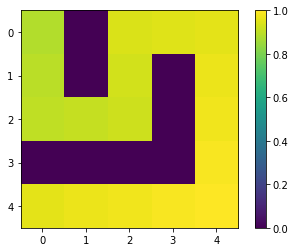

In [22]:
plt.imshow(Q.max(axis=1).reshape(5,5))
plt.colorbar()

In [23]:
Qs = np.array(Qs).reshape(-1,25,4)
Qs.shape

(100, 25, 4)

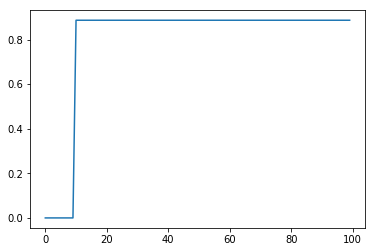

In [24]:
plt.plot(Qs.max(axis=2)[:,0])